In [1]:
from src.multiplex_network import MultiplexNetwork, EuclidianDistance
import pandas as pd

# Ejemplo de datos (esto sería tu DataFrame real)
data = pd.read_csv("../datasets/datos_curados_por_comuna.csv", sep=";")
comuna_data = pd.DataFrame(data)

comuna_data.describe()

,COD_Com,Inasistencia_escolar_2023,Trabajo_infantil_2023,Desempleo_de_larga_duracion_2023,Empleo_informal_2023,Hacinamiento_2023,Tasa_de_desempleo_2022,Indice_Desarrollo_Humano_2021,Turismo_en_Total_Establecimientos,Restaurantes_en_Total_Establecimientos,Bares_en_Total_Establecimientos,Servicios_en_Turismo,Alojamientos_en_Turismo,Entretenimiento_en_Turismo
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000,21.000000,21.000000,20.000000,20.000000,20.000000
mean,23.142857,4.616667,2.408571,9.594286,52.789048,1.690000,10.510952,0.700952,0.025236,0.075418,0.032441,0.322653,0.448326,0.229021
std,28.061158,2.486370,1.746618,2.794873,12.873219,2.692072,3.141858,0.063946,0.006191,0.042175,0.019443,0.128197,0.165370,0.070445
min,1.000000,0.890000,0.000000,4.890000,22.730000,0.000000,5.040000,0.610000,0.014752,0.036957,0.009456,0.071429,0.231579,0.071429
25%,6.000000,3.070000,1.310000,7.860000,47.520000,0.000000,8.220000,0.660000,0.021914,0.060121,0.014740,0.243732,0.316506,0.205887
50%,11.000000,4.590000,1.910000,8.860000,55.020000,0.840000,10.270000,0.700000,0.024438,0.066783,0.031759,0.310265,0.413225,0.255564
75%,16.000000,5.870000,3.110000,11.020000,61.020000,1.970000,12.790000,0.730000,0.026309,0.072676,0.038444,0.435363,0.572053,0.273295
max,90.000000,10.990000,7.570000,16.920000,73.290000,10.820000,16.470000,0.870000,0.039908,0.250000,0.083333,0.536842,0.857143,0.343284


verify all the columns are float if not is necesary to convert them.
if the values are categorical is necesary to convert them to numeric values or adjust the code accordingly.

In [2]:

comuna_data.dtypes

COD_Com                                     int64
Nombre_Comuna                              object
Inasistencia_escolar_2023                 float64
Trabajo_infantil_2023                     float64
Desempleo_de_larga_duracion_2023          float64
Empleo_informal_2023                      float64
Hacinamiento_2023                         float64
Tasa_de_desempleo_2022                    float64
Indice_Desarrollo_Humano_2021             float64
Turismo_en_Total_Establecimientos         float64
Restaurantes_en_Total_Establecimientos    float64
Bares_en_Total_Establecimientos           float64
Servicios_en_Turismo                      float64
Alojamientos_en_Turismo                   float64
Entretenimiento_en_Turismo                float64
dtype: object

In [3]:
indicadores = {
    "social": [
        "Inasistencia_escolar_2023",
        "Trabajo_infantil_2023",
        "Desempleo_de_larga_duracion_2023",
        "Hacinamiento_2023",
        "Indice_Desarrollo_Humano_2021"
    ],
    "economico": [
        "Empleo_informal_2023",
        "Tasa_de_desempleo_2022",
        "Restaurantes_en_Total_Establecimientos",
        "Bares_en_Total_Establecimientos",
    ],
    "turismo": [
        "Turismo_en_Total_Establecimientos",
        "Servicios_en_Turismo",
        "Alojamientos_en_Turismo",
        "Entretenimiento_en_Turismo"
    ]
}


In [4]:
# Inicializar la red multiplex
multiplex = MultiplexNetwork(comuna_data, "Nombre_Comuna")

distance_strategy = EuclidianDistance()

multiplex.add_layer("social", indicadores["social"], distance_strategy, threshold=7)

multiplex.add_layer("economico", indicadores["economico"], distance_strategy, threshold=10)

multiplex.add_layer("turismo", indicadores["turismo"], distance_strategy, threshold=0.2)

Es necesario estudiar los threshold 

In [5]:
# Obtener una capa específica y visualizarla
social_layer = multiplex.get_layer('social')
print("Nodos en la capa de social:", social_layer.nodes())
print("Enlaces en la capa de social:", social_layer.edges(data=True))

Nodos en la capa de social: ['Popular', 'Manrique', 'Aranjuez', 'Castilla', 'Doce_de_Octubre', 'Buenos_Aires', 'La_Candelaria', 'Laureles_Estadio', 'Belen', 'Corregimiento_de_San_Sebastian_de_Palmitas', 'Corregimiento_de_San_Cristobal', 'Corregimiento_de_San_Antonio_de_Prado', 'Santa_Cruz', 'Robledo', 'La_America', 'El_Poblado', 'Guayabal', 'Corregimiento_de_Altavista', 'San_Javier', 'Villa_Hermosa']
Enlaces en la capa de social: [('Popular', 'Manrique', {'weight': np.float64(0.26494524378673534)}), ('Popular', 'Aranjuez', {'weight': np.float64(0.1970373085055093)}), ('Popular', 'Castilla', {'weight': np.float64(0.1759015777170294)}), ('Popular', 'Doce_de_Octubre', {'weight': np.float64(0.19927331229588488)}), ('Popular', 'Buenos_Aires', {'weight': np.float64(0.1335485809417411)}), ('Popular', 'La_Candelaria', {'weight': np.float64(0.15330779903081806)}), ('Popular', 'Laureles_Estadio', {'weight': np.float64(0.13146813388038056)}), ('Popular', 'Belen', {'weight': np.float64(0.133721432

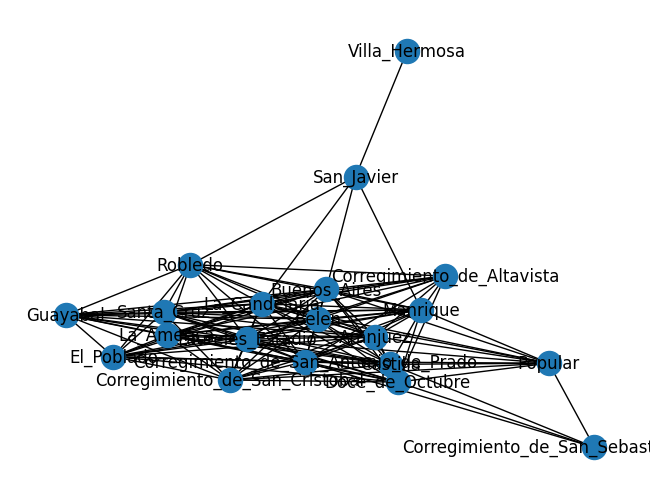

In [6]:
import networkx as nx

nx.draw(multiplex.layers["social"], with_labels=True)

In [7]:
for layer_name, network in multiplex.layers.items():
    nx.write_graphml(network, f"../networks/multiplex_network_{layer_name}.graphml")